In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def generate_data(n,w):
    if "sparse" in str(type(w)):
        w = w.toarray()
    X = np.random.randn(n,w.shape[0])
    y = np.matmul(X,w)
    return X,y

def generate_noisy_data(n,w):
    X = np.random.randn(n,len(w))
    y = np.matmul(X,w) + 0.1*np.random.randn(n)
    return X,y

# ols is invariant

In [3]:
d = 10
n = 20
w = np.random.randn(d)
X, y = generate_data(n, w)

In [4]:
w,resid,rank,s = np.linalg.lstsq(X,y)
np.matmul(X,w)

array([-6.03928684,  1.57610878, -3.98152955,  2.33580818,  2.20929006,
       -7.10628114,  3.3878155 ,  6.36464603, -3.29094873, -2.04482306,
        3.09029448, -2.91782936,  2.70421914,  1.19279265, -1.32033631,
        0.04845396,  3.3885377 ,  0.39268664,  2.71260031, -1.92177075])

In [5]:
yscale = 5*y
Xscale = 3*X
wscale,resid,rank,s = np.linalg.lstsq(Xscale, yscale)
np.matmul(Xscale,wscale) / 5

array([-6.03928684,  1.57610878, -3.98152955,  2.33580818,  2.20929006,
       -7.10628114,  3.3878155 ,  6.36464603, -3.29094873, -2.04482306,
        3.09029448, -2.91782936,  2.70421914,  1.19279265, -1.32033631,
        0.04845396,  3.3885377 ,  0.39268664,  2.71260031, -1.92177075])

# ridge regression is not scaling invariant

In [6]:
(np.matmul(X.T,X) + np.eye(d)).shape

(10, 10)

In [7]:
w,resid,rank,s = np.linalg.lstsq((np.matmul(X.T,X) + np.eye(d)), np.matmul(X.T,y))
np.matmul(X,w)

array([-5.88877291,  1.57582303, -3.83532092,  2.3206548 ,  2.18501337,
       -6.73726757,  3.0906025 ,  6.01007179, -3.07479887, -1.76852281,
        3.00677848, -2.70287546,  2.51553193,  1.14823475, -1.12069836,
       -0.01955386,  3.19665274,  0.2438987 ,  2.74392489, -1.91344277])

In [8]:
yscale = 5*y
Xscale = 3*X
wscale,resid,rank,s = np.linalg.lstsq((np.matmul(Xscale.T,Xscale) + np.eye(d)), np.matmul(Xscale.T,yscale))
np.matmul(Xscale,wscale) / 5

array([-6.02291779,  1.57615557, -3.96421272,  2.33582195,  2.20675892,
       -7.06366446,  3.35009936,  6.32169365, -3.26477523, -2.00837977,
        3.08264627, -2.89135579,  2.68041927,  1.18696173, -1.29435292,
        0.04053184,  3.36660728,  0.37269716,  2.71903383, -1.92122679])

In [9]:
# standardize
def standardize(X,y):
    X_standard = X - np.mean(X,0)
    X_standard = np.matmul(X_standard, np.diag(1/np.std(X,0)))
    
    y_standard = y - np.mean(y)
    y_standard = y_standard / np.std(y)
    
    return X_standard, y_standard

In [10]:
Xs, ys = standardize(X,y)
w,resid,rank,s = np.linalg.lstsq((np.matmul(Xs.T,Xs) + np.eye(d)), np.matmul(Xs.T,ys))
np.matmul(Xs,w)

array([-1.71950432,  0.43895546, -1.14428933,  0.67237005,  0.63091003,
       -1.98030011,  0.90923745,  1.75188636, -0.92567688, -0.53066475,
        0.86454199, -0.81154226,  0.70980557,  0.32344561, -0.339663  ,
       -0.0069376 ,  0.90548635,  0.04349   ,  0.77647925, -0.56802987])

In [11]:
yscale = 5*y + 3000
Xscale = 3*X + 200

Xss, yss = standardize(Xscale,yscale)
wscale,resid,rank,s = np.linalg.lstsq((np.matmul(Xss.T,Xss) + np.eye(d)), np.matmul(Xss.T,yss))
np.matmul(Xss, wscale)

array([-1.71950432,  0.43895546, -1.14428933,  0.67237005,  0.63091003,
       -1.98030011,  0.90923745,  1.75188636, -0.92567688, -0.53066475,
        0.86454199, -0.81154226,  0.70980557,  0.32344561, -0.339663  ,
       -0.0069376 ,  0.90548635,  0.04349   ,  0.77647925, -0.56802987])

# let's compare different kinds of regularized regression

In [12]:
from sklearn.linear_model import Ridge,Lasso
lamda = 1

In [19]:
# ridge
## training the model
def ridge_regression(X,y, lamda=1):
    ridgeReg = Ridge(alpha=lamda, normalize=True)
    ridgeReg.fit(X,y)
#    pred = ridgeReg.predict(X)
#    return ridgeReg.coef_, ridgeReg.intercept_
    return ridgeReg

# lasso
def lasso(X,y, lamda=1):
    lassoReg = Lasso(alpha=lamda)
    lassoReg.fit(X,y)
    return lassoReg

# nnls
def nnls(X,y):
    nnlsReg = sp.optimize.nnls(X, y.flatten())
    return nnlsReg

In [29]:
# generate data
d = 30
w_randn = np.random.randn(d)
w_sparse = sp.sparse.rand(d, 1, density=0.5)
w_pos = sp.sparse.rand(d, 1, density=0.5)

# find best model for each type of data
w = w_randn

In [30]:
X,y = generate_data(30, w)
ridgeReg = ridge_regression(X,y, lamda = 1)
lassoReg = lasso(X,y, lamda=1)
nnlsReg = nnls(X,y)

w_ridge = ridgeReg.coef_.T
w_lasso = lassoReg.coef_
w_nonneg = nnlsReg[0]

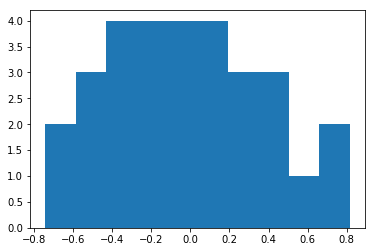

In [31]:
plt.clf()
plt.hist(w_ridge)
plt.show()

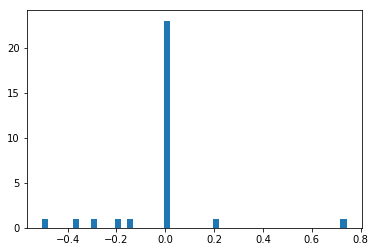

In [32]:
plt.clf()
plt.hist(w_lasso,bins=50)
plt.show()

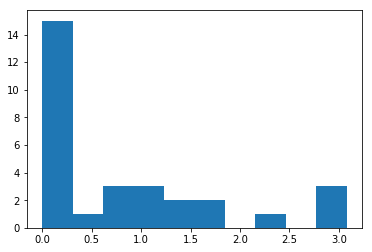

In [33]:
plt.clf()
plt.hist(w_nonneg)
plt.show()

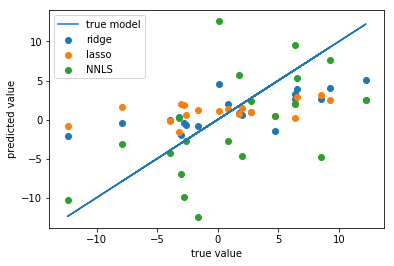

In [34]:
# which fits data best?
Xtest,ytest = generate_data(20,w)

plt.clf()
plt.scatter(ytest,ridgeReg.predict(Xtest),label="ridge")
plt.scatter(ytest,lassoReg.predict(Xtest),label="lasso")
plt.scatter(ytest,np.matmul(Xtest,w_nonneg),label="NNLS")
plt.plot(ytest,ytest,label="true model")
plt.legend()
plt.xlabel("true value")
plt.ylabel("predicted value")
plt.show()

F:\install\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
F:\install\anaconda\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.0480914491203869e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)


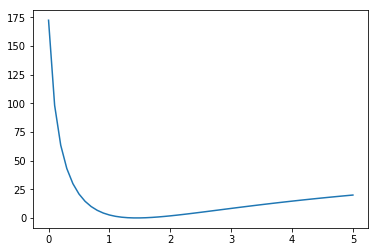

In [35]:
# cross validate over lambda
w = .5*np.random.randn(40)
X,y = generate_noisy_data(30, w)
Xtest,ytest = generate_noisy_data(30, w)

ls = np.linspace(0,5,num = 5/0.1+1)
error = []
for i in ls:
    ridgeReg = ridge_regression(X,y, lamda=i)
    error.append(np.sum(ytest - ridgeReg.predict(Xtest))**2)

plt.clf()
plt.plot(ls, error)
plt.show()